In [1]:
import pandas as pd
import statsmodels.formula.api as smf
import seaborn as sb
import matplotlib.pyplot as plt
from statsmodels.iolib.summary2 import summary_col
import math

body = pd.read_csv("/Users/Woo Hyeon Her/Desktop/BA222/BA222 프로젝트/BA222 Project 2/body.csv")
body.head()

,age,gender,height_cm,weight_kg,body_fat_percent,diastolic,systolic,gripForce,sit_and_bend_forward_cm,sit_ups_counts,broad_jump_cm,class
0,27,M,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C
1,25,M,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A
2,31,M,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C
3,32,M,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B
4,28,M,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B


In [2]:
# SUMMARY STATISTICS FOR AGE AND SIT-UPS COUNTS
sumStat = body[["age", "sit_ups_counts"]].agg(["mean", "median", "std", "min", "max"])
# sumStat.to_csv("sumStat for age and sit ups counts.csv")
sumStat

,age,sit_ups_counts
mean,36.775106,39.771224
median,32.000000,41.000000
std,13.625639,14.276698
min,21.000000,0.000000
max,64.000000,80.000000


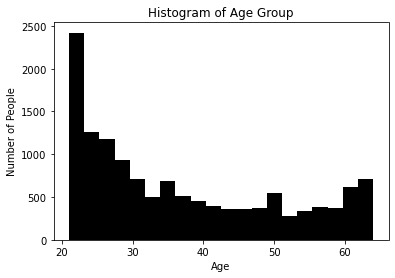

In [3]:
# HISTOGRAM OF AGE
body["age"].plot.hist(bins = 20, color = "black")

plt.xlabel("Age")
plt.ylabel("Number of People")
plt.title("Histogram of Age Group")
plt.show()
# plt.savefig("HistogramAgeGroup")

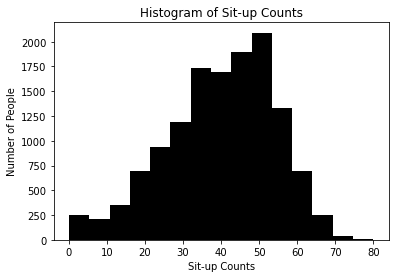

In [16]:
# HISTOGRAM OF SIT-UP COUNTS
body["sit_ups_counts"].plot.hist(bins = 15, color = "black")

plt.xlabel("Sit-up Counts")
plt.ylabel("Number of People")
plt.title("Histogram of Sit-up Counts")
plt.show()
# plt.savefig("Histogram of Sit up counts")

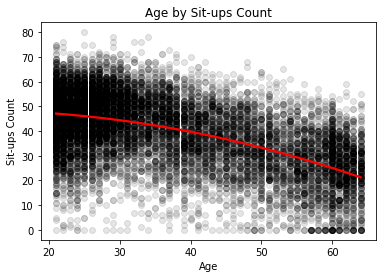

In [33]:
# SCATTERPLOT OF AGE BY SIT-UPS COUNT
plt.scatter(body.age, body.sit_ups_counts, color="black", alpha=0.1)
sb.regplot(x= "age", y = "sit_ups_counts", data = body, color="black", order = 2, ci = False,\
          line_kws = {"color": "red"}, scatter_kws = {"alpha": 0})

plt.xlabel("Age")
plt.ylabel("Sit-ups Count")
plt.title("Age by Sit-ups Count")
# plt.show()
plt.savefig("Scatterplot of age by sit up counts")

In [37]:
# UNIVARIATE REGRESSION MODEL FOR SIT_UPS_COUNTS ON AGE 
ols_1 = smf.ols("sit_ups_counts ~ age", data = body).fit()

ols_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         sit_ups_counts   R-squared:                       0.297
Model:                            OLS   Adj. R-squared:                  0.297
Method:                 Least Squares   F-statistic:                     5646.
Date:                Tue, 12 Apr 2022   Prob (F-statistic):               0.00
Time:                        18:36:53   Log-Likelihood:                -52255.
No. Observations:               13393   AIC:                         1.045e+05
Df Residuals:                   13391   BIC:                         1.045e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     60.7552      0.298    203.996      0.000      60.171      61.339
age           -0.5706      0.008    -75.138      0.000      -0.585      -0.556
==============================================================================
Omnibus:                      445.965   Durbin-Watson:                   2.032
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              492.327
Skew:                          -0.454   Prob(JB):                    1.24e-107
Kurtosis:                       3.239   Cond. No.                         113.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [23]:
# CORRELATION MATRIX OF SIT-UPS-COUNTS AND AGE
corMatrix = body.corr()[["sit_ups_counts" , "age"]]
corMatrix["product"] = abs(corMatrix.sit_ups_counts * corMatrix.age)
File = corMatrix.sort_values("product", ascending = False)

# File.to_csv("corMatrix of sit ups counts and age.csv")
File

,sit_ups_counts,age,product
age,-0.544581,1.000000,0.544581
sit_ups_counts,1.000000,-0.544581,0.544581
broad_jump_cm,0.748273,-0.435172,0.325627
body_fat_percent,-0.608912,0.242302,0.147541
height_cm,0.500424,-0.293980,0.147115
gripForce,0.576669,-0.179583,0.103560
weight_kg,0.294899,-0.099966,0.029480
sit_and_bend_forward_cm,0.177153,-0.070033,0.012407
systolic,0.056276,0.211167,0.011884
diastolic,0.016547,0.158508,0.002623


In [9]:
# MULTIVARIATE REGRESSION MODEL 
ols_1 = smf.ols("sit_ups_counts ~ age", data = body).fit()
ols_2 = smf.ols("sit_ups_counts ~ age + broad_jump_cm", data = body).fit()
ols_3 = smf.ols("sit_ups_counts ~ age + broad_jump_cm + body_fat_percent", data = body).fit()
ols_4 = smf.ols("sit_ups_counts ~ age + broad_jump_cm + body_fat_percent + height_cm", data = body).fit()


regResults = summary_col([ols_1, ols_2, ols_3, ols_4], regressor_order = ["Intercept", "age", "broad_jump_cm", "body_fat_percent", "height_cm"], stars = True)

# regResults.tables[0].to_csv("regResults.csv")
regResults

,sit_ups_counts I,sit_ups_counts II,sit_ups_counts III,sit_ups_counts IIII
Intercept,60.7552***,7.2355***,28.1815***,36.4978***
,(0.2978),(0.5484),(0.8533),(1.9530)
age,-0.5706***,-0.2830***,-0.2973***,-0.2976***
,(0.0076),(0.0062),(0.0060),(0.0060)
broad_jump_cm,,0.2259***,0.1710***,0.1781***
,,(0.0021),(0.0027),(0.0031)
body_fat_percent,,,-0.4300***,-0.4374***
,,,(0.0137),(0.0138)
height_cm,,,,-0.0562***
,,,,(0.0119)
